## Visualizing heatmaps of class activation

References:

http://marubon-ds.blogspot.com/2018/03/class-activation-map-with-keras.html

https://jacobgil.github.io/deeplearning/class-activation-maps

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from keras.applications import VGG16


c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 590s 1us/step


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = "c:/users/a00439512\Downloads\creative_commons_elephant.jpg"
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [12]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Exception: URL fetch failure on https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json: None -- [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [13]:
np.argmax(preds[0])

101

In [18]:
african_elephant_output = model.output[:, 101]

In [19]:
last_conv_layer = model.get_layer('block5_conv3')

In [20]:
from keras import backend as K

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

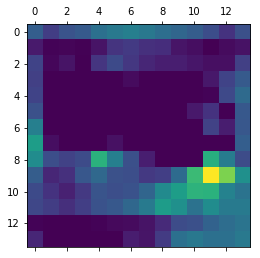

In [22]:
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [25]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('c:/users/a00439512/Downloads/elephant_cam.jpg', superimposed_img)

True